# NN from Assignment 1

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

%matplotlib inline

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

path = "training_data.csv"

data = pd.read_csv(path)
data = data.sample(frac=1)

target = 'Facies'
features = [feature for feature in list(data.head(0)) if feature not in ("Well Name", "Formation", "Facies")]

X = data[features]

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)


y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_sizes = list(range(295,2065,295))

assign1_nn = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=80, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

# Training and testing on original data

In [29]:
import sklearn.model_selection

assign1_nn.fit(X_train,y_train)

gridsearch = sklearn.model_selection.GridSearchCV(estimator = assign1_nn, param_grid = {}, cv=5)
gridsearch.fit(X_train, y_train)
print(gridsearch.cv_results_['mean_fit_time'])
print(gridsearch.cv_results_['mean_train_score'])
print(gridsearch.cv_results_['mean_test_score'])

def grid_score(est, xtrain, ytrain):
    gridsearch = sklearn.model_selection.GridSearchCV(estimator = est, param_grid = {}, cv=5)
    gridsearch.fit(xtrain, ytrain)
    print(gridsearch.cv_results_['mean_fit_time'])
    print(gridsearch.cv_results_['mean_train_score'])
    print(gridsearch.cv_results_['mean_test_score'])
    
#y_pred = assign1_nn.predict(X_test)
#print(classification_report(y_test,y_pred))

#print(sklearn.metrics.accuracy_score(y_test, y_pred))
#print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

[3.09681091]
[0.77562489]
[0.68742747]


# Training and testing after dimensionality reduction

## PCA

In [31]:
from sklearn.decomposition import PCA

pca4 = PCA(n_components=4)
pca4_transformed = pca4.fit_transform(X_train)
pca4_transformed_test = pca4.transform(X_test)

assign1_nn.fit(pca4_transformed,y_train)

y_pred = assign1_nn.predict(pca4_transformed_test)

grid_score(assign1_nn, pca4_transformed, y_train)

[2.83548021]
[0.62630826]
[0.58568665]


## ICA

In [32]:
from sklearn.decomposition import FastICA

ica3 = FastICA(n_components=3)
ica3_transformed = ica3.fit_transform(X_train)
ica3_transformed_test = ica3.transform(X_test)

assign1_nn.fit(ica3_transformed,y_train)

y_pred = assign1_nn.predict(ica3_transformed_test)

grid_score(assign1_nn, ica3_transformed, y_train)

[2.36480198]
[0.48152975]
[0.4754352]


## Randomized Projections

In [33]:
#Reconstruction error (try this for LDA as well?)

"""
transformer = random_projection.GaussianRandomProjection(n_components = 20, eps =.2)

X_reduced = transformer.fit_transform(X)

randMat = transformer.components_

X_Proj = X_reduced.dot(randMat)
"""

from sklearn.random_projection import GaussianRandomProjection

grp = GaussianRandomProjection(n_components = 5)

grp_transformed = grp.fit_transform(X_train)

assign1_nn.fit(grp_transformed,y_train)

grp_transformed_test = grp.transform(X_test)

y_pred = assign1_nn.predict(grp_transformed_test)


grid_score(assign1_nn, grp_transformed, y_train)

[2.73694634]
[0.66808642]
[0.6073501]


## LDA

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_transformed = lda.fit_transform(X_train, y_train)

lda_transformed_test = lda.transform(X_test)

assign1_nn.fit(lda_transformed,y_train)

y_pred = assign1_nn.predict(lda_transformed_test)

grid_score(assign1_nn, lda_transformed, y_train)

print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

[1.98666534]
[0.41895675]
[0.4131528]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.43      1.00      0.60       134
           3       1.00      0.03      0.06       132
           4       0.37      0.33      0.35        43
           5       0.00      0.00      0.00        56
           6       0.34      0.64      0.44        92
           7       0.00      0.00      0.00        20
           8       0.46      0.52      0.49        91
           9       0.56      0.30      0.39        30

   micro avg       0.41      0.41      0.41       647
   macro avg       0.35      0.31      0.26       647
weighted avg       0.46      0.41      0.31       647

0.4126738794435858
0.2584108831375001


# Training and testing after dimensionality reduction and clustering

## PCA and k Means and EM

[[ 1.82076744 -0.85054581 -0.7649277  ...  0.          0.
   1.        ]
 [-1.94590299  0.41405247 -0.04450519 ...  0.          1.
   0.        ]
 [-1.64315243  1.07188413 -0.72170894 ...  0.          1.
   0.        ]
 ...
 [-1.62135185  0.12356456  0.52133125 ...  0.          1.
   0.        ]
 [ 0.24442655  0.31244813 -0.67141087 ...  0.          0.
   1.        ]
 [ 0.21204043 -0.02584873  0.53381069 ...  0.          0.
   1.        ]]
(2585, 8)
[2.95290828]
[0.62930142]
[0.57833656]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.43      1.00      0.60       134
           3       1.00      0.03      0.06       132
           4       0.37      0.33      0.35        43
           5       0.00      0.00      0.00        56
           6       0.34      0.64      0.44        92
           7       0.00      0.00      0.00        20
           8       0.46      0.52      0.49        91
           9       0

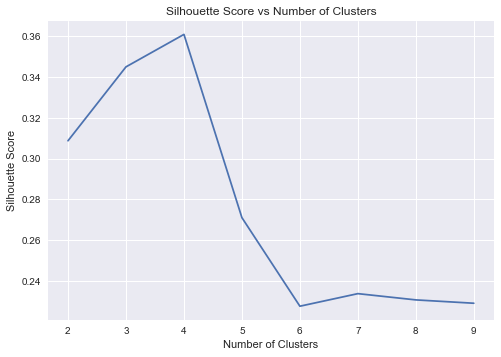

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

pca4 = PCA(n_components=4)
pca4_transformed = pca4.fit_transform(X_train)

plt.plot(range(2,10), silhouette_scores)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')


#Using n_clusters = 4 from previous experimentation
kmeans = KMeans(n_clusters=4, random_state=0, n_init = 10)
cluster_labels = kmeans.fit_predict(pca4_transformed)

onehot_seg = np.eye(4)[cluster_labels]

pca4_transformed

pcakmeans_dm_clust = np.concatenate((pca4_transformed, onehot_seg), axis=1)

print(pcakmeans_dm_clust)
print(pcakmeans_dm_clust.shape)


grid_score(assign1_nn, pcakmeans_dm_clust, y_train)

print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

In [64]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=0, n_init = 10)

cluster_labels = gm.fit_predict(pca4_transformed)

onehot_seg = np.eye(5)[cluster_labels]

pcakmeans_dm_clust = np.concatenate((pca4_transformed, onehot_seg), axis=1)

print("GridScore:")
grid_score(assign1_nn, pcakmeans_dm_clust, y_train)
print("====")
print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

GridScore:
[2.98895445]
[0.64883728]
[0.59110251]
====
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.43      1.00      0.60       134
           3       1.00      0.03      0.06       132
           4       0.37      0.33      0.35        43
           5       0.00      0.00      0.00        56
           6       0.34      0.64      0.44        92
           7       0.00      0.00      0.00        20
           8       0.46      0.52      0.49        91
           9       0.56      0.30      0.39        30

   micro avg       0.41      0.41      0.41       647
   macro avg       0.35      0.31      0.26       647
weighted avg       0.46      0.41      0.31       647

0.4126738794435858
0.2584108831375001


## ICA and k Means and EM

In [52]:
ica3 = FastICA(n_components=3)
ica3_transformed = ica3.fit_transform(X_train)
ica3_transformed_test = ica3.transform(X_test)

assign1_nn.fit(ica3_transformed,y_train)

y_pred = assign1_nn.predict(ica3_transformed_test)

grid_score(assign1_nn, ica3_transformed, y_train)

kmeans = KMeans(n_clusters=4, random_state=0, n_init = 10)
cluster_labels = kmeans.fit_predict(ica3_transformed)

onehot_seg = np.eye(4)[cluster_labels]

pcakmeans_dm_clust = np.concatenate((ica3_transformed, onehot_seg), axis=1)

grid_score(assign1_nn, pcakmeans_dm_clust, y_train)

print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

#Using k means 

[2.52795582]
[0.4812376]
[0.47659574]
[2.55929089]
[0.47156557]
[0.46692456]
              precision    recall  f1-score   support

           1       0.51      0.41      0.45        49
           2       0.43      0.74      0.54       134
           3       0.63      0.38      0.47       132
           4       0.50      0.28      0.36        43
           5       0.00      0.00      0.00        56
           6       0.40      0.64      0.49        92
           7       0.00      0.00      0.00        20
           8       0.43      0.58      0.49        91
           9       0.00      0.00      0.00        30

   micro avg       0.45      0.45      0.45       647
   macro avg       0.32      0.34      0.31       647
weighted avg       0.41      0.45      0.41       647

0.4528593508500773
0.3127131967557945


In [62]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=0, n_init = 10)

cluster_labels = gm.fit_predict(ica3_transformed)

onehot_seg = np.eye(5)[cluster_labels]

pcakmeans_dm_clust = np.concatenate((ica3_transformed, onehot_seg), axis=1)

print("GridScore:")
grid_score(assign1_nn, pcakmeans_dm_clust, y_train)
print("====")
print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

GridScore:
[2.60421147]
[0.48172317]
[0.47466151]
====
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.43      1.00      0.60       134
           3       1.00      0.03      0.06       132
           4       0.37      0.33      0.35        43
           5       0.00      0.00      0.00        56
           6       0.34      0.64      0.44        92
           7       0.00      0.00      0.00        20
           8       0.46      0.52      0.49        91
           9       0.56      0.30      0.39        30

   micro avg       0.41      0.41      0.41       647
   macro avg       0.35      0.31      0.26       647
weighted avg       0.46      0.41      0.31       647

0.4126738794435858
0.2584108831375001


## Randomized Projections and k Means and EM

In [53]:
from sklearn.random_projection import GaussianRandomProjection

grp = GaussianRandomProjection(n_components = 5)

grp_transformed = grp.fit_transform(X_train)

assign1_nn.fit(grp_transformed,y_train)

grp_transformed_test = grp.transform(X_test)

kmeans = KMeans(n_clusters=4, random_state=0, n_init = 10)
cluster_labels = kmeans.fit_predict(grp_transformed)

onehot_seg = np.eye(4)[cluster_labels]

pcakmeans_dm_clust = np.concatenate((grp_transformed, onehot_seg), axis=1)

grid_score(assign1_nn, pcakmeans_dm_clust, y_train)

print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

[2.80679388]
[0.69545678]
[0.62940039]
              precision    recall  f1-score   support

           1       0.51      0.41      0.45        49
           2       0.43      0.74      0.54       134
           3       0.63      0.38      0.47       132
           4       0.50      0.28      0.36        43
           5       0.00      0.00      0.00        56
           6       0.40      0.64      0.49        92
           7       0.00      0.00      0.00        20
           8       0.43      0.58      0.49        91
           9       0.00      0.00      0.00        30

   micro avg       0.45      0.45      0.45       647
   macro avg       0.32      0.34      0.31       647
weighted avg       0.41      0.45      0.41       647

0.4528593508500773
0.3127131967557945


In [63]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=0, n_init = 10)

cluster_labels = gm.fit_predict(grp_transformed)

onehot_seg = np.eye(5)[cluster_labels]

pcakmeans_dm_clust = np.concatenate((grp_transformed, onehot_seg), axis=1)

print("GridScore:")
grid_score(assign1_nn, pcakmeans_dm_clust, y_train)
print("====")
print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

GridScore:
[2.87683754]
[0.69671651]
[0.62669246]
====
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.43      1.00      0.60       134
           3       1.00      0.03      0.06       132
           4       0.37      0.33      0.35        43
           5       0.00      0.00      0.00        56
           6       0.34      0.64      0.44        92
           7       0.00      0.00      0.00        20
           8       0.46      0.52      0.49        91
           9       0.56      0.30      0.39        30

   micro avg       0.41      0.41      0.41       647
   macro avg       0.35      0.31      0.26       647
weighted avg       0.46      0.41      0.31       647

0.4126738794435858
0.2584108831375001


## LDA and k Means and EM

In [66]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init = 10)
cluster_labels = kmeans.fit_predict(lda_transformed)

onehot_seg = np.eye(4)[cluster_labels]

pcakmeans_dm_clust = np.concatenate((lda_transformed, onehot_seg), axis=1)

print("GridScore:")
grid_score(assign1_nn, pcakmeans_dm_clust, y_train)
print("====")
print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

GridScore:
[0.69019094]
[0.40445001]
[0.40348162]
====
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.43      1.00      0.60       134
           3       1.00      0.03      0.06       132
           4       0.37      0.33      0.35        43
           5       0.00      0.00      0.00        56
           6       0.34      0.64      0.44        92
           7       0.00      0.00      0.00        20
           8       0.46      0.52      0.49        91
           9       0.56      0.30      0.39        30

   micro avg       0.41      0.41      0.41       647
   macro avg       0.35      0.31      0.26       647
weighted avg       0.46      0.41      0.31       647

0.4126738794435858
0.2584108831375001


In [68]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=0, n_init = 10)

cluster_labels = gm.fit_predict(lda_transformed)

onehot_seg = np.eye(5)[cluster_labels]

pcakmeans_dm_clust = np.concatenate((lda_transformed, onehot_seg), axis=1)

print("GridScore:")
grid_score(assign1_nn, pcakmeans_dm_clust, y_train)
print("====")
print(classification_report(y_test,y_pred))

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

GridScore:
[0.49178419]
[0.40503295]
[0.39497099]
====
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.43      1.00      0.60       134
           3       1.00      0.03      0.06       132
           4       0.37      0.33      0.35        43
           5       0.00      0.00      0.00        56
           6       0.34      0.64      0.44        92
           7       0.00      0.00      0.00        20
           8       0.46      0.52      0.49        91
           9       0.56      0.30      0.39        30

   micro avg       0.41      0.41      0.41       647
   macro avg       0.35      0.31      0.26       647
weighted avg       0.46      0.41      0.31       647

0.4126738794435858
0.2584108831375001
